# Customer Personality Analysis  and Segmentation

# About Dataset

## Context

### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content

### Attributes

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


### Target
- Need to perform clustering to summarize customer segments.

### Acknowledgement
- The dataset for this project is provided by Dr. Omar Romero-Hernandez.

In [866]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [867]:
df = pd.read_csv("marketing_campaign.csv",sep="\t")

In [868]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [869]:
df.shape

(2240, 29)

In [870]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [872]:
df.duplicated().sum()

0

In [873]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [874]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


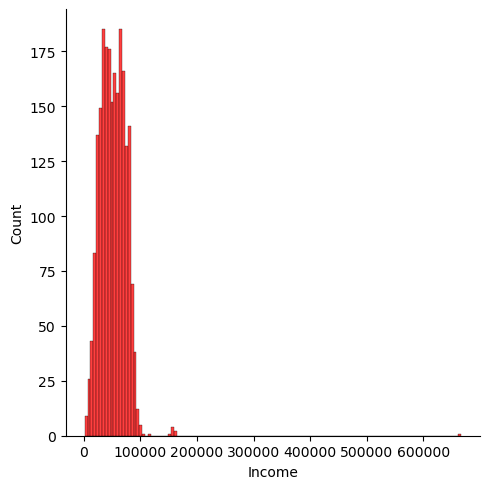

In [875]:
sns.displot(df["Income"],kind="hist",color="red")

In [876]:
(df.isna().sum()["Income"]/len(df["Income"]))*100

1.0714285714285714

<Axes: xlabel='Education', ylabel='Income'>

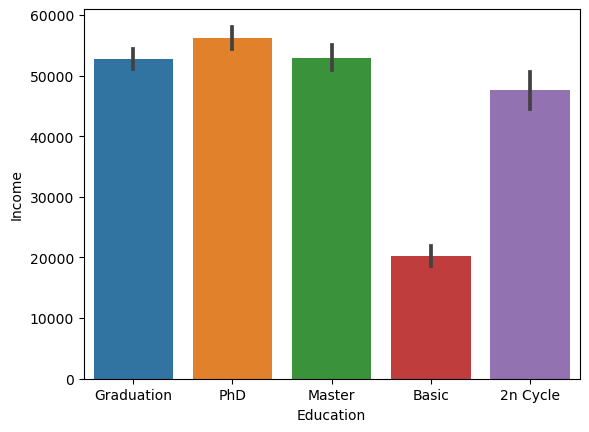

In [877]:
sns.barplot(x=df["Education"],y=df["Income"])

In [878]:
df.groupby("Education").median()["Income"]

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_34763/1544059448.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Education").median()["Income"]


Education
2n Cycle      46805.0
Basic         20744.0
Graduation    52028.5
Master        50943.0
PhD           55212.0
Name: Income, dtype: float64

In [879]:
income_by_edu = df.groupby("Education").median()["Income"].to_dict()

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_34763/534836409.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_by_edu = df.groupby("Education").median()["Income"].to_dict()


In [880]:
df[df["Income"].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [881]:
df["Income"].fillna(df["Education"].map(income_by_edu),inplace=True)

In [882]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [883]:
df.iloc[10]

ID                           1994
Year_Birth                   1983
Education              Graduation
Marital_Status            Married
Income                    52028.5
Kidhome                         1
Teenhome                        0
Dt_Customer            15-11-2013
Recency                        11
MntWines                        5
MntFruits                       5
MntMeatProducts                 6
MntFishProducts                 0
MntSweetProducts                2
MntGoldProds                    1
NumDealsPurchases               1
NumWebPurchases                 1
NumCatalogPurchases             0
NumStorePurchases               2
NumWebVisitsMonth               7
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 10, dtyp

In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [885]:
df.duplicated().sum()

0

In [886]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [887]:
df.select_dtypes("object").columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

<Axes: xlabel='Marital_Status', ylabel='count'>

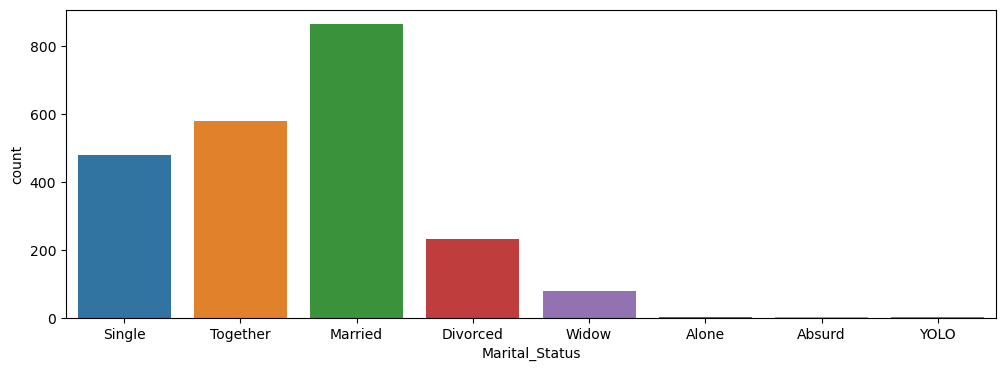

In [888]:
plt.figure(figsize=(12,4))
sns.countplot(df,x=df["Marital_Status"])

In [889]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [890]:
marital_list = ["Divorced","Widow","Alone","Absurd","YOLO"]

In [891]:
df["Marital_Status"]=df["Marital_Status"].apply(lambda x: "Others" if x in marital_list else x)

<Axes: xlabel='Marital_Status', ylabel='count'>

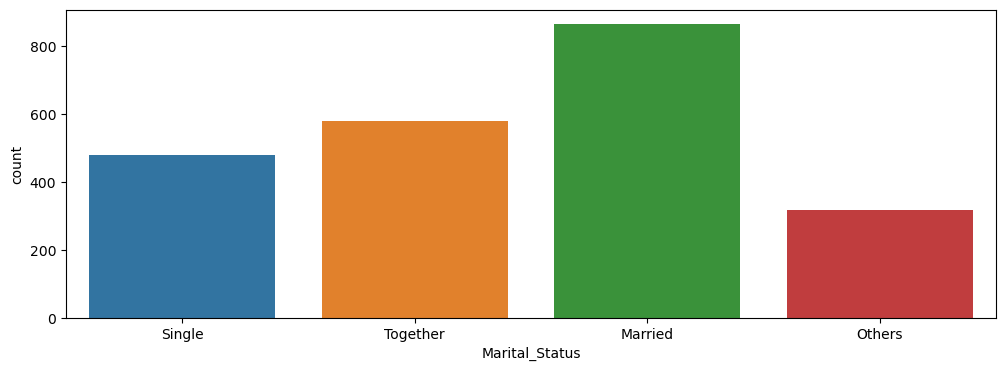

In [892]:
plt.figure(figsize=(12,4))
sns.countplot(df,x=df["Marital_Status"])

In [893]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Others      316
Name: Marital_Status, dtype: int64

In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [895]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_34763/2850095250.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])


In [896]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [897]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [898]:
df["Dt_Customer"] = df["Dt_Customer"].dt.year

In [899]:
df["Dt_Customer"]

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2240, dtype: int64

In [900]:
df["Dt_Customer"].describe()

count    2240.000000
mean     2013.028125
std         0.684554
min      2012.000000
25%      2013.000000
50%      2013.000000
75%      2013.000000
max      2014.000000
Name: Dt_Customer, dtype: float64

In [901]:
df["Dt_Customer"].value_counts()

2013    1189
2014     557
2012     494
Name: Dt_Customer, dtype: int64

In [902]:
df["Dt_Customer"] = pd.to_numeric(df["Dt_Customer"])

In [903]:
df["Yr_Customer"] = 2023-df["Dt_Customer"]

In [904]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Yr_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012,58,635,...,0,0,0,0,0,0,3,11,1,11
1,2174,1954,Graduation,Single,46344.0,1,1,2014,38,11,...,0,0,0,0,0,0,3,11,0,9
2,4141,1965,Graduation,Together,71613.0,0,0,2013,26,426,...,0,0,0,0,0,0,3,11,0,10
3,6182,1984,Graduation,Together,26646.0,1,0,2014,26,11,...,0,0,0,0,0,0,3,11,0,9
4,5324,1981,PhD,Married,58293.0,1,0,2014,94,173,...,0,0,0,0,0,0,3,11,0,9


In [905]:
df.drop(columns="Dt_Customer",axis="columns",inplace=True)

In [906]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Yr_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,3,11,1,11
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,3,11,0,9
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,3,11,0,10
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,3,11,0,9
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,3,11,0,9


In [907]:
df.drop(columns="ID",axis="columns",inplace=True)

In [908]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Yr_Customer
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,3,11,1,11
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,3,11,0,9
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,3,11,0,10
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,3,11,0,9
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,3,11,0,9


In [909]:
df.drop(columns=["Z_CostContact","Z_Revenue"],axis="columns",inplace=True)

In [910]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [911]:
df["Age"] = 2023 - df["Year_Birth"]

In [912]:
df.drop(columns="Year_Birth",axis="columns",inplace=True)

In [913]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Yr_Customer,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,11,66
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,9,69
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,10,58
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,9,39
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,9,42


In [914]:
df["ChildrenAtHome"] = df["Kidhome"]+df["Teenhome"]

In [915]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Yr_Customer,Age,ChildrenAtHome
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,11,66,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,9,69,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,10,58,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,9,39,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,9,42,1


In [916]:
df.drop(columns=["Kidhome","Teenhome"],axis="columns",inplace=True)

In [917]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Yr_Customer,Age,ChildrenAtHome
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,11,66,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,9,69,2
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,10,58,0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,9,39,1
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,9,42,1


In [918]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Yr_Customer', 'Age',
       'ChildrenAtHome'],
      dtype='object')

In [919]:
df["Expenditure"] = df["MntFishProducts"]+df["MntFruits"]+df["MntGoldProds"]+df["MntMeatProducts"]+df["MntSweetProducts"]+df["MntWines"]

In [920]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Yr_Customer,Age,ChildrenAtHome,Expenditure
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,11,66,0,1617
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,9,69,2,27
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,10,58,0,776
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,9,39,1,53
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,9,42,1,422


In [921]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Yr_Customer', 'Age',
       'ChildrenAtHome', 'Expenditure'],
      dtype='object')

In [922]:
df["Accepted_Campaigns"] = df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]+df["Response"]

In [923]:
df.drop(columns=["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"],axis="columns",inplace=True)

In [924]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Yr_Customer,Age,ChildrenAtHome,Expenditure,Accepted_Campaigns
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,0,11,66,0,1617,1
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,0,9,69,2,27,0
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,0,10,58,0,776,0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,0,9,39,1,53,0
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,0,9,42,1,422,0


In [925]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Yr_Customer', 'Age', 'ChildrenAtHome', 'Expenditure',
       'Accepted_Campaigns'],
      dtype='object')

In [926]:
prods = df[['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]
prods.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


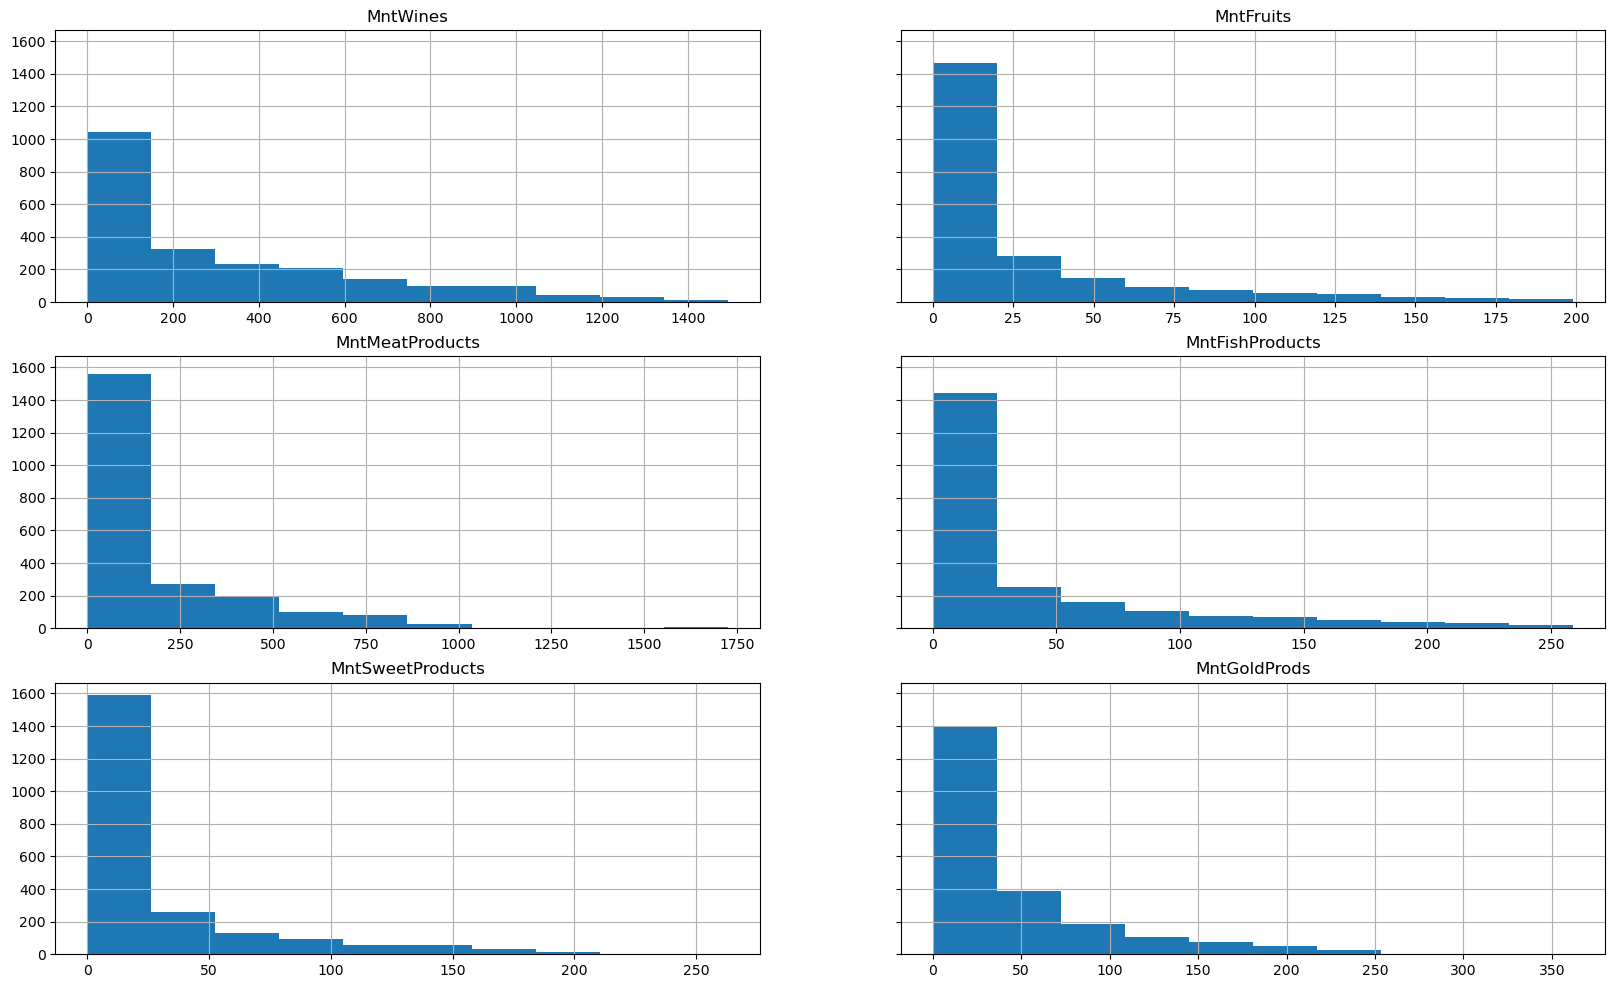

In [927]:
fig, axes = plt.subplots(3, 2, figsize=(20, 12), sharey=True)
for col, ax in zip(prods.columns, axes.flat):
    df[col].hist(ax=ax)
    ax.set_title(col)
    
# delete the leftover axes
for ax in axes.flat[prods.columns.size:]:
     ax.set_axis_off()

<Axes: >

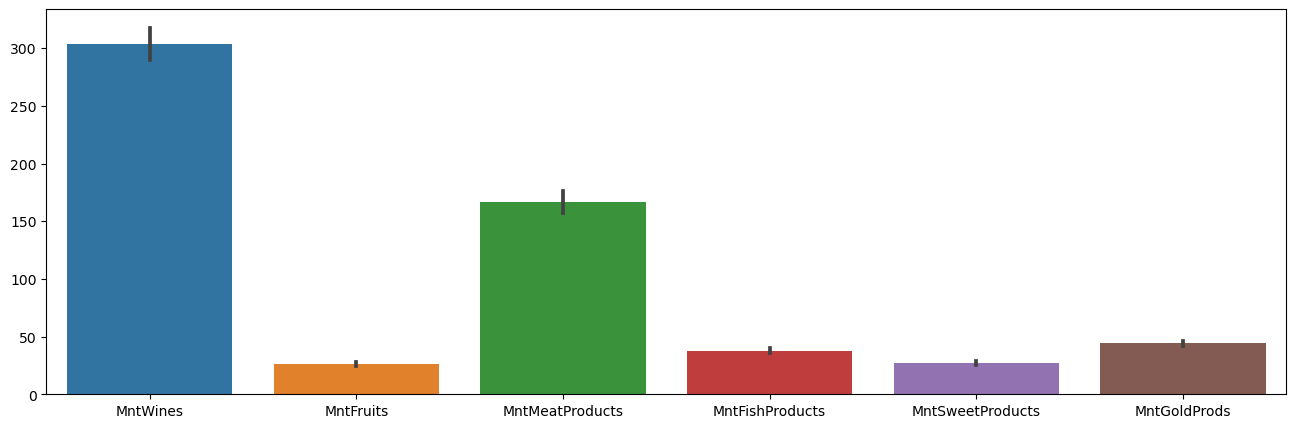

In [928]:
plt.figure(figsize=(16,5))
sns.barplot(prods)

<Axes: xlabel='Expenditure', ylabel='Count'>

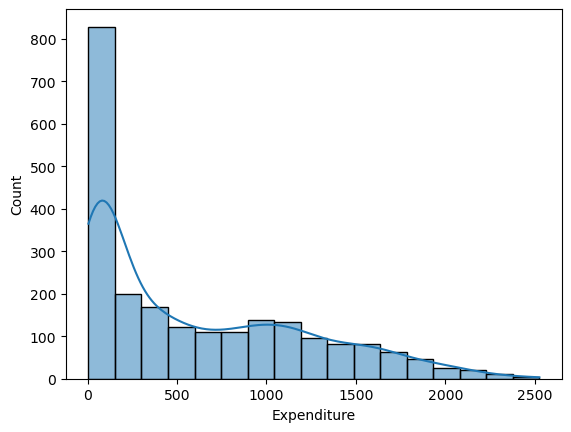

In [929]:
sns.histplot(df["Expenditure"],kde=True)

In [930]:
df.drop(columns=['MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'],axis="columns",inplace=True)

In [931]:
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Yr_Customer,Age,ChildrenAtHome,Expenditure,Accepted_Campaigns
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,11,66,0,1617,1
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,9,69,2,27,0
2,Graduation,Together,71613.0,26,1,8,2,10,4,0,10,58,0,776,0
3,Graduation,Together,26646.0,26,2,2,0,4,6,0,9,39,1,53,0
4,PhD,Married,58293.0,94,5,5,3,6,5,0,9,42,1,422,0


In [932]:
platform = df[["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]]
platform.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6


In [933]:
platform.sum()

NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64

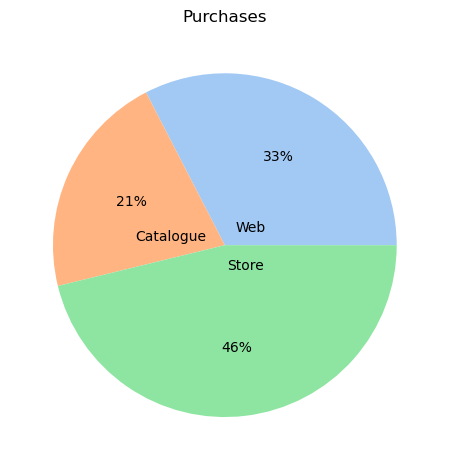

In [934]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(x=platform.sum(),
        labels=["Web","Catalogue","Store"],
        colors=colors,
        autopct='%.0f%%',
        labeldistance = 0.12)
plt.title("Purchases")
plt.tight_layout()

In [935]:
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Yr_Customer,Age,ChildrenAtHome,Expenditure,Accepted_Campaigns
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,11,66,0,1617,1
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,9,69,2,27,0
2,Graduation,Together,71613.0,26,1,8,2,10,4,0,10,58,0,776,0
3,Graduation,Together,26646.0,26,2,2,0,4,6,0,9,39,1,53,0
4,PhD,Married,58293.0,94,5,5,3,6,5,0,9,42,1,422,0


In [936]:
marital_df = df.groupby("Marital_Status")["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"].sum()
marital_df.head()

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_34763/2581361082.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  marital_df = df.groupby("Marital_Status")["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"].sum()


,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Marital_Status,,,
Married,3532,2268,5055
Others,1392,895,1881
Single,1859,1248,2707
Together,2367,1552,3327


In [937]:
marital_df.columns

Index(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'], dtype='object')

In [938]:
marital_df.index

Index(['Married', 'Others', 'Single', 'Together'], dtype='object', name='Marital_Status')

<Axes: ylabel='Marital_Status'>

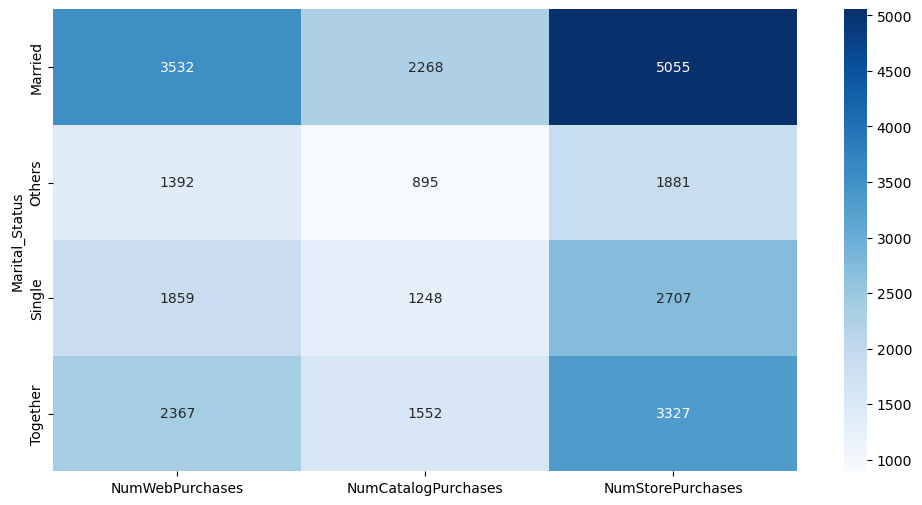

In [939]:
plt.figure(figsize=(12,6))
sns.heatmap(marital_df,annot=True,cmap='Blues', fmt='g')

<Axes: xlabel='Age', ylabel='Expenditure'>

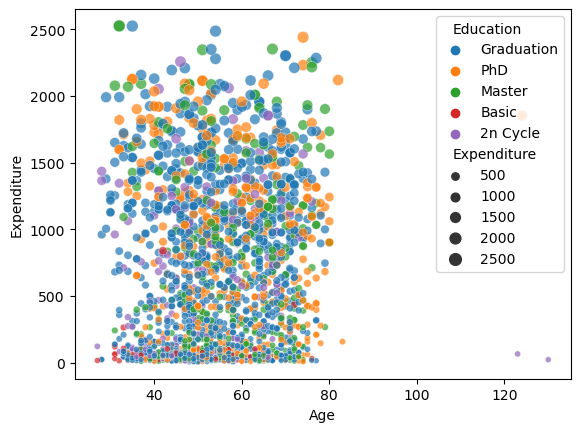

In [940]:
sns.scatterplot(x=df["Age"],y=df["Expenditure"],hue=df["Education"],size=df["Expenditure"],alpha=0.7)

<Axes: xlabel='Education', ylabel='Expenditure'>

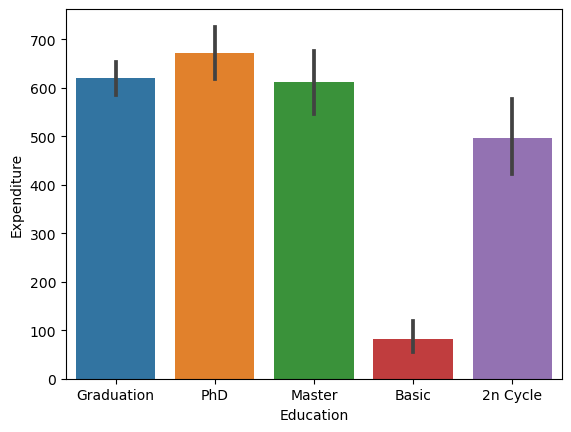

In [941]:
sns.barplot(x=df["Education"],y=df["Expenditure"])

<Axes: xlabel='Marital_Status', ylabel='Expenditure'>

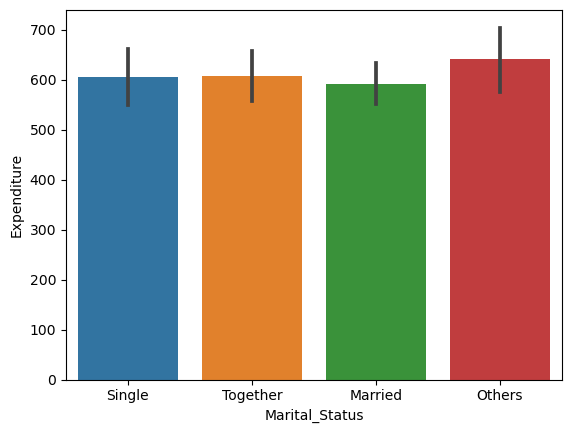

In [942]:
sns.barplot(x=df["Marital_Status"],y=df["Expenditure"])

In [943]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Yr_Customer', 'Age', 'ChildrenAtHome',
       'Expenditure', 'Accepted_Campaigns'],
      dtype='object')

<Axes: xlabel='ChildrenAtHome', ylabel='Expenditure'>

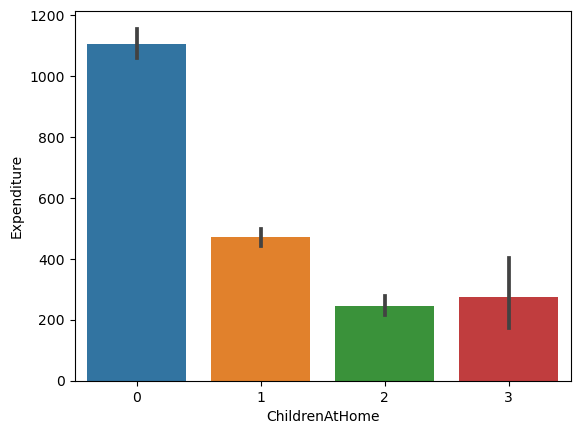

In [944]:
sns.barplot(x=df["ChildrenAtHome"],y=df["Expenditure"])

<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>

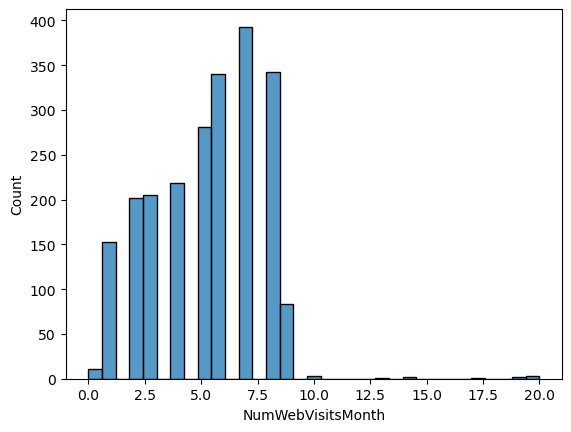

In [945]:
sns.histplot(x=df["NumWebVisitsMonth"])

In [946]:
df["Complain"].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

<Axes: xlabel='Education', ylabel='Income'>

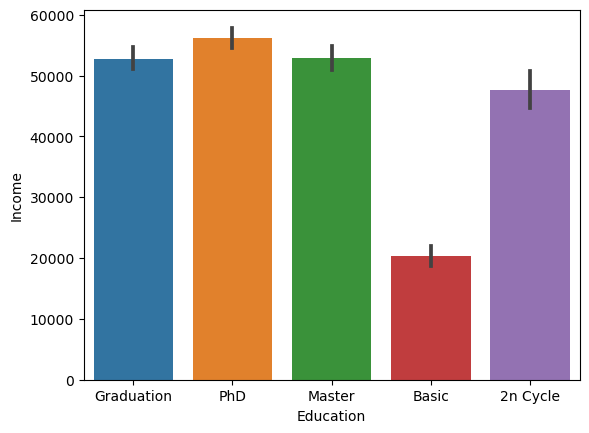

In [947]:
sns.barplot(x=df["Education"],y=df["Income"])

<Axes: xlabel='Income', ylabel='Expenditure'>

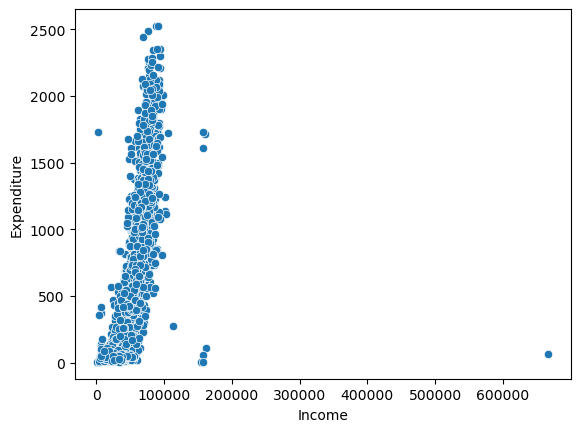

In [948]:
sns.scatterplot(df,x=df["Income"],y=df["Expenditure"])

In [949]:
df[df["Income"]>=600000]

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Yr_Customer,Age,ChildrenAtHome,Expenditure,Accepted_Campaigns
2233,Graduation,Together,666666.0,23,4,3,1,3,6,0,10,46,1,62,0


In [950]:
df.drop([2233],inplace=True)

/var/folders/mq/8mg7dy2n5hl_p580ygz8nh640000gn/T/ipykernel_34763/2463816556.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="Blues",annot=True)


<Axes: >

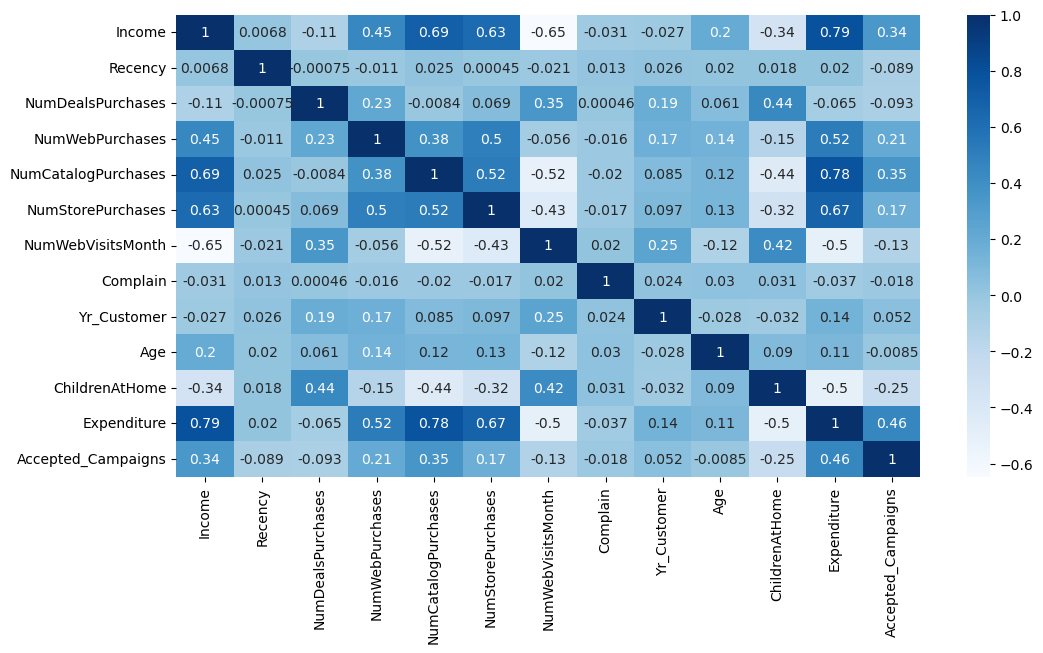

In [951]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap="Blues",annot=True)

## Model 

In [952]:
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Yr_Customer,Age,ChildrenAtHome,Expenditure,Accepted_Campaigns
0,Graduation,Single,58138.0,58,3,8,10,4,7,0,11,66,0,1617,1
1,Graduation,Single,46344.0,38,2,1,1,2,5,0,9,69,2,27,0
2,Graduation,Together,71613.0,26,1,8,2,10,4,0,10,58,0,776,0
3,Graduation,Together,26646.0,26,2,2,0,4,6,0,9,39,1,53,0
4,PhD,Married,58293.0,94,5,5,3,6,5,0,9,42,1,422,0


In [953]:
df.select_dtypes("object").columns

Index(['Education', 'Marital_Status'], dtype='object')

In [954]:
df = pd.get_dummies(df,columns=["Education","Marital_Status"],drop_first=True)

In [955]:
df.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Yr_Customer,Age,ChildrenAtHome,Expenditure,Accepted_Campaigns,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Others,Marital_Status_Single,Marital_Status_Together
0,58138.0,58,3,8,10,4,7,0,11,66,0,1617,1,0,1,0,0,0,1,0
1,46344.0,38,2,1,1,2,5,0,9,69,2,27,0,0,1,0,0,0,1,0
2,71613.0,26,1,8,2,10,4,0,10,58,0,776,0,0,1,0,0,0,0,1
3,26646.0,26,2,2,0,4,6,0,9,39,1,53,0,0,1,0,0,0,0,1
4,58293.0,94,5,5,3,6,5,0,9,42,1,422,0,0,0,0,1,0,0,0


In [956]:
from sklearn.cluster import KMeans

In [957]:
wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",random_state=12)
    km.fit(df)
    wcss.append(km.inertia_)

/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sunny/anacond

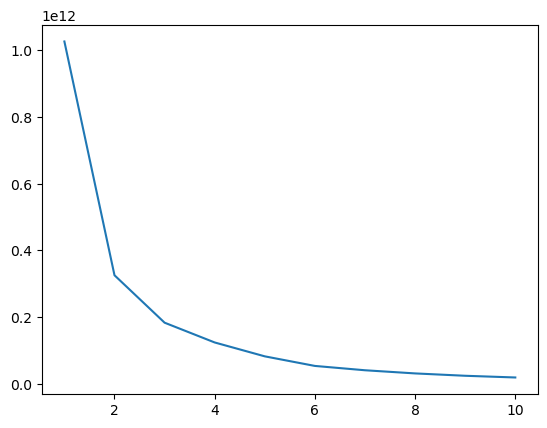

In [958]:
plt.plot(range(1,11),wcss)

In [963]:
km_2 = KMeans(n_clusters=3,init="k-means++",random_state=12)

In [964]:
km_2.fit(df)

/Users/sunny/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=12)

In [965]:
cluster = km_2.predict(df)

In [966]:
df["Cluster"] = cluster
df["Cluster"].value_counts()

0    809
2    743
1    687
Name: Cluster, dtype: int64

In [977]:
cluster_centroids = km_2.cluster_centers_

In [981]:
cluster_centroids

array([[5.24020006e+04, 4.96971570e+01, 3.09888752e+00, 4.74042027e+00,
        2.25339926e+00, 6.06180470e+00, 5.68850433e+00, 4.94437577e-03,
        1.00086527e+01, 5.69851669e+01, 1.22867738e+00, 4.99918418e+02,
        3.04079110e-01, 2.77555756e-17, 4.74660074e-01, 1.92830655e-01,
        2.49690977e-01, 1.64400494e-01, 2.05191595e-01, 2.59579728e-01,
        9.64153276e-01],
       [7.69678443e+04, 4.90174672e+01, 1.60989811e+00, 5.39737991e+00,
        5.45414847e+00, 8.40320233e+00, 3.15574964e+00, 7.27802038e-03,
        9.93304221e+00, 5.55662300e+01, 4.36681223e-01, 1.28371907e+03,
        8.77729258e-01, 1.04083409e-17, 5.31295488e-01, 1.54294032e-01,
        2.38719068e-01, 1.45560408e-01, 2.03784571e-01, 2.60553130e-01,
        1.40902475e+00],
       [2.83803755e+04, 4.85895020e+01, 2.14131898e+00, 2.15881561e+00,
        5.27590848e-01, 3.08209960e+00, 6.90847914e+00, 1.61507402e-02,
        9.96769852e+00, 4.98977120e+01, 1.12247645e+00, 9.49892328e+01,
        2.0457

In [983]:
df.columns

Index(['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Yr_Customer', 'Age', 'ChildrenAtHome', 'Expenditure',
       'Accepted_Campaigns', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Others',
       'Marital_Status_Single', 'Marital_Status_Together', 'Cluster'],
      dtype='object')

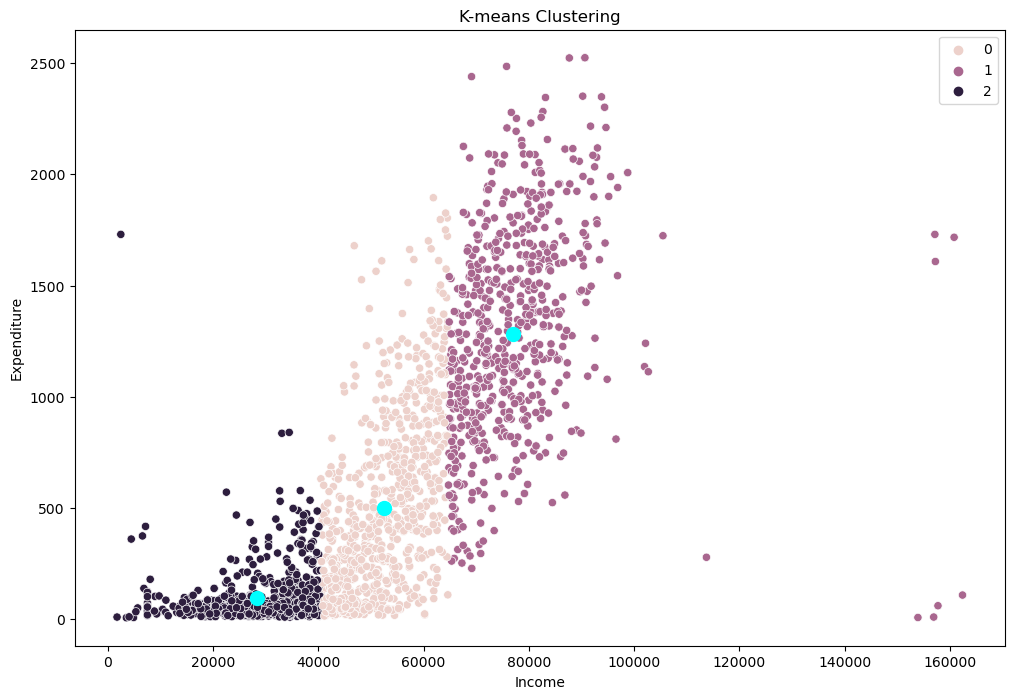

In [988]:
plt.figure(figsize=(12,8))
sns.scatterplot(df,x=df["Income"],y=df["Expenditure"],hue = cluster) 

# Set the title and axis labels
plt.title('K-means Clustering')
plt.xlabel('Income')
plt.ylabel('Expenditure')

plt.scatter(cluster_centroids[:,0], cluster_centroids[:,11], c="cyan", s = 100) 

In [989]:
df.groupby("Cluster")[["Income","Expenditure"]].mean()

,Income,Expenditure
Cluster,,
0,52402.000618,499.918418
1,76967.844250,1283.719068
2,28380.375505,94.989233
